In [16]:
import os
import pickle
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix,classification_report
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"
tf.keras.backend.clear_session()

In [17]:
with open("data_batch_1","rb") as f:
    batch = pickle.load(f, encoding='bytes')

In [18]:
X = batch[b'data']
y = np.array(batch[b'labels'])

In [19]:
X_images = X.reshape(-1,3,32,32).transpose(0,2,3,1)

In [20]:
label_names = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

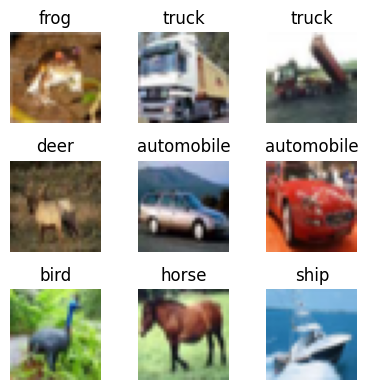

In [21]:
plt.figure(figsize = (4,4))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(X_images[i])
    plt.title(label_names[y[i]])
    plt.axis('off')
plt.tight_layout()
plt.show()


In [22]:
X_images = X.reshape(-1,3,32,32).transpose(0,2,3,1).astype("float32") / 255.0

In [23]:
num_classes = 10
y_cat = tf.keras.utils.to_categorical(y,num_classes=num_classes)

In [24]:
X_train, y_train = X_images[:4000],y_cat[:4000]
X_test,y_test =  X_images[4000:5000],y_cat[4000:5000]

In [25]:
print("Train set:", X_train.shape, y_train.shape)
print("Test set:", X_test.shape,y_test.shape)

Train set: (4000, 32, 32, 3) (4000, 10)
Test set: (1000, 32, 32, 3) (1000, 10)


In [26]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),

    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),

    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.Flatten(),

    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(num_classes, activation='softmax')
])

In [27]:
model.compile(optimizer = 'adam',
             loss = 'categorical_crossentropy',
             metrics = ['accuracy'])

In [28]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 128)         73856     
                                                                 
 flatten (Flatten)           (None, 2048)              0

In [29]:
history = model.fit(X_train, y_train, epochs = 10, batch_size = 64, validation_data = (X_test, y_test), verbose = 1)

Epoch 1/10
63/63 [==============================] - 2s 18ms/step - loss: 2.1407 - accuracy: 0.1950 - val_loss: 1.9908 - val_accuracy: 0.2400
Epoch 2/10
63/63 [==============================] - 1s 14ms/step - loss: 1.8135 - accuracy: 0.3252 - val_loss: 1.6711 - val_accuracy: 0.3940
Epoch 3/10
63/63 [==============================] - 1s 13ms/step - loss: 1.6128 - accuracy: 0.4058 - val_loss: 1.5432 - val_accuracy: 0.4500
Epoch 4/10
63/63 [==============================] - 1s 13ms/step - loss: 1.4942 - accuracy: 0.4557 - val_loss: 1.4845 - val_accuracy: 0.4540
Epoch 5/10
63/63 [==============================] - 1s 13ms/step - loss: 1.3592 - accuracy: 0.5138 - val_loss: 1.5093 - val_accuracy: 0.4700
Epoch 6/10
63/63 [==============================] - 1s 13ms/step - loss: 1.3396 - accuracy: 0.5200 - val_loss: 1.4377 - val_accuracy: 0.4950
Epoch 7/10
63/63 [==============================] - 1s 13ms/step - loss: 1.2500 - accuracy: 0.5525 - val_loss: 1.4036 - val_accuracy: 0.5010
Epoch 8/10
63

In [30]:
train_loss, train_acc = model.evaluate(X_train, y_train, verbose = 0)
test_loss, test_acc = model.evaluate(X_test, y_test, verbose = 0)

In [31]:
print(f"Training_Accuracy: {train_acc:.4f}, Training_loss: {train_loss:.4f}")
print(f"Test_Accuracy: {test_acc:.4f}, Test_loss: {test_loss:.4f}")

Training_Accuracy: 0.6450, Training_loss: 0.9873
Test_Accuracy: 0.5090, Test_loss: 1.4037


In [36]:
y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis = 1)
y_true = np.argmax(y_test, axis = 1)

32/32 [==============================] - 0s 3ms/step


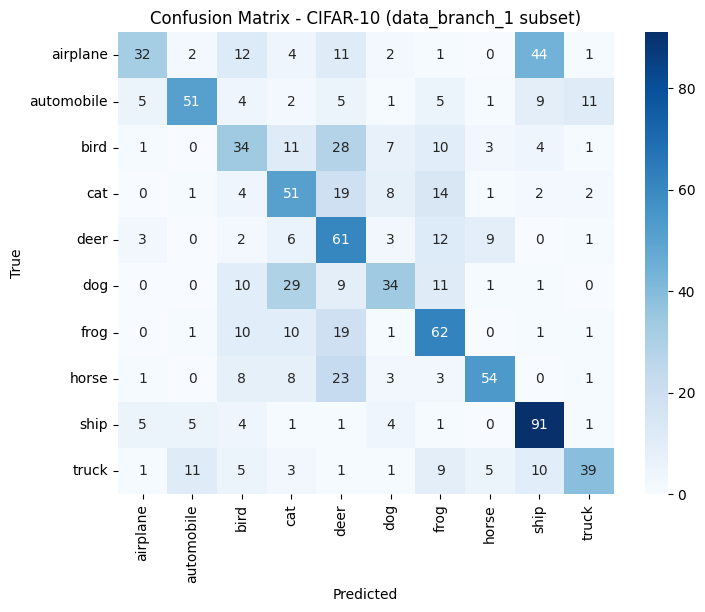

In [38]:
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize = (8,6))
sns.heatmap (cm, annot=True,fmt ="d",cmap="Blues",xticklabels=label_names,yticklabels=label_names)
plt.title("Confusion Matrix - CIFAR-10 (data_branch_1 subset)")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

In [39]:
print(classification_report(y_true,y_pred,target_names=label_names))

              precision    recall  f1-score   support

    airplane       0.67      0.29      0.41       109
  automobile       0.72      0.54      0.62        94
        bird       0.37      0.34      0.35        99
         cat       0.41      0.50      0.45       102
        deer       0.34      0.63      0.45        97
         dog       0.53      0.36      0.43        95
        frog       0.48      0.59      0.53       105
       horse       0.73      0.53      0.62       101
        ship       0.56      0.81      0.66       113
       truck       0.67      0.46      0.55        85

    accuracy                           0.51      1000
   macro avg       0.55      0.51      0.51      1000
weighted avg       0.55      0.51      0.51      1000



1/1 [==============================] - 0s 17ms/step


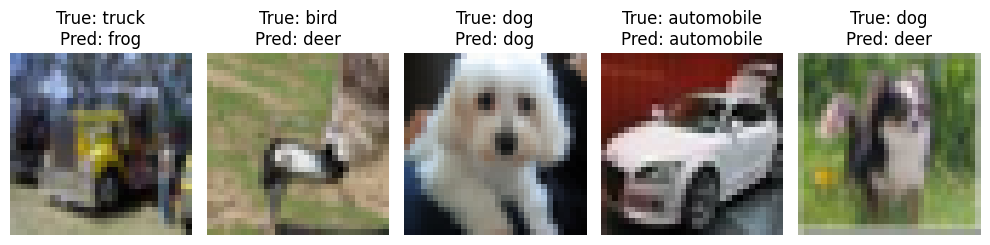

In [46]:
num_samples = 5
idx = np.random.randint(0,len(X_test),num_samples)
sample_images = X_test[idx]
sample_labels = y_true[idx]
sample_preds = np.argmax(model.predict(sample_images),axis=1)
plt.figure(figsize=(10,4))
for i in range (num_samples):
    plt.subplot(1,num_samples,i+1)
    plt.imshow(sample_images[i])
    plt.title(f"True: {label_names[sample_labels[i]]}\nPred: {label_names[sample_preds[i]]}")
    plt.axis('off')
    plt.tight_layout()
    plt.show